# License Plate Detection and Recognition

A computer vision project that focuses on the detection and recognition of license plates in images. This system is designed to locate license plates in images, extract the characters from the plates, and convert them into digital text.

---

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

(200, 627)


(Text(0.5, 1.0, 'Template edges'), ([], []), ([], []))

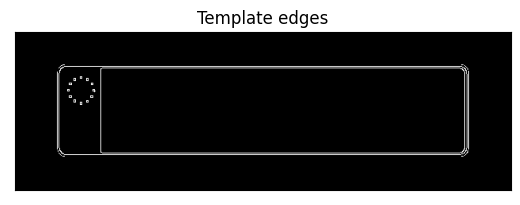

In [7]:
templ = cv.imread('Images/plate_template.jpeg', cv.IMREAD_GRAYSCALE)
templ_edges = cv.Canny(templ, 100, 220)
print(templ.shape)
plt.imshow(templ_edges, cmap='gray')
plt.title("Template edges"), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edges after opening'), ([], []), ([], []))

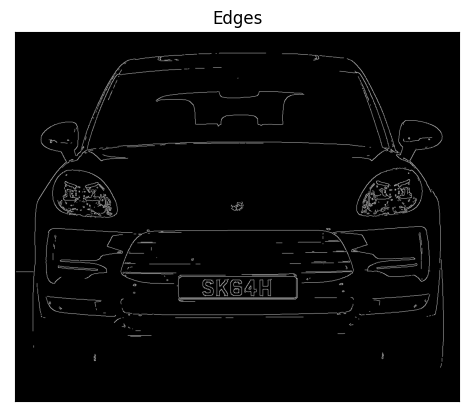

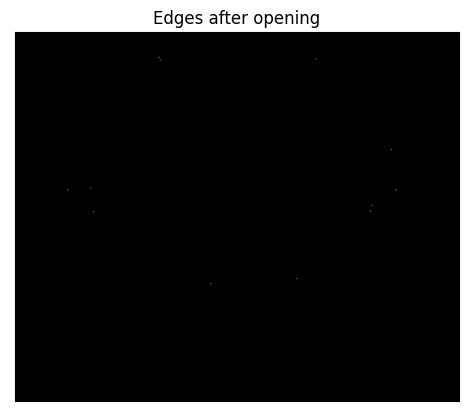

In [8]:
# Load the input image
img_color = cv.imread('Images/carplate1.webp', cv.IMREAD_COLOR)
img = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# Edge detection on the input image
edges = cv.Canny(img, 200, 220)  # You may need to adjust the threshold values
plt.imshow(edges, cmap='gray')
plt.title("Edges"), plt.xticks([]), plt.yticks([])

# perform openinig on the edges
kernel = np.ones((2, 2), np.uint8)
edges_open = cv.morphologyEx(edges, cv.MORPH_OPEN, kernel)
plt.figure()
plt.imshow(edges_open, cmap='gray')
plt.title("Edges after opening"), plt.xticks([]), plt.yticks([])

In [9]:
# Initialize the Generalized Hough Transform
gh = cv.createGeneralizedHoughGuil()

# Set the reference templ and set other parameters (e.g., scale and rotation)
gh.setTemplate(templ_edges)

# Detect the shape in the input image
positions, votes = gh.detect(edges)

(Text(0.5, 1.0, 'Result'), ([], []), ([], []))

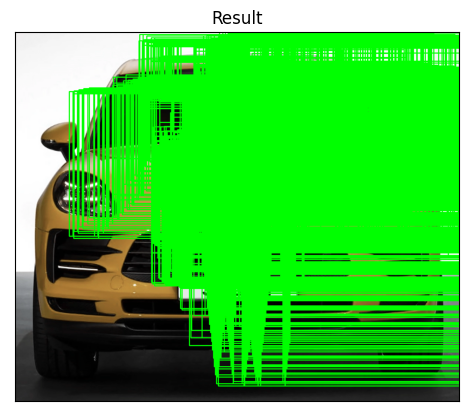

In [10]:
# Draw detected shapes on the original image
for pos in positions[0][:,:4]:
    x, y, scale, angle = pos
    x = int(x)
    y = int(y)
    angle = int(angle)
    cv.rectangle(img_color, (x, y), (x + int(templ.shape[1]*scale), y + int(templ.shape[0]*scale)), (0, 255, 0), 2)

# Display the result
plt.imshow(img_color, cmap='gray')
plt.title("Result"), plt.xticks([]), plt.yticks([])